# Problem Statment

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.



As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users.



In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

   1. Data sourcing and sentiment analysis
   2. Building a recommendation system
   3. Improving the recommendations using the sentiment analysis model
   4. Deploying the end-to-end project with a user interface



Steps involved in the project
1. Exploratory data analysis
2. Data cleaning
3. Text preprocessing
4. Feature extraction
4. Training the text classification model using Logistic Regression, Random forest,XGBoost & Naive Bayes.
5. Creating a recommedation systems (User based and Item Based choose the bestone)
6. Evaluating the model and recommedation system using the Test data
7. Create flask application
8. Deploy the application to heroku platform

Note: 1. Out of these four models, you need to select one classification model based on its performance.

Note 2.  Your task is to analyse the recommendation systems and select the one that is best suited in this case from User-based recommendation system and Item-based recommendation system.

Note 3. Once you get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings and
Note 4:  Then filter top 5 positive sentiment products using sentiment analyis predication model.




In [5]:
pip freeze > requirement.txt

In [6]:
#importing colab libraries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path='/content/drive/MyDrive/GEN AI/Captson project/sentiment based product recomendation  system/'
!ls '/content/drive/MyDrive/GEN AI/Captson project/sentiment based product recomendation  system/'

 app.py		  requirements.txt
 heroku_url.txt  'sample30 (1).csv'
 model.py	  sample30.csv
 pickle_file	 'Setiment_Based_Product_Recommendation_System_Kunal Sahu_Capstone.ipynb'
 Procfile	  templates
 README.md


In [8]:
#importing dependent libraries
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
%matplotlib inline



from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
## for building ther model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

In [9]:
pd.set_option('max_colwidth', 500)

# ****1. Data Loading****  

In [10]:
#  Reading the data andf loading into dataframedf = pd.read_csv(path+'sample30.csv')
sbpr_df = pd.read_csv(path+'sample30.csv')
df=sbpr_df.copy() # creating a copy of data
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
9132,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-02-14T16:09:45.000Z,NaN,True,5,I have used Clorox wipes since they hit the market. I will not use any other brand or off brand. Nothing stands up to the name.,This Product Cleans White Woodwork And Trim Extremely Well.,Dunbar,NaN,supergirl,Negative
20212,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-26T00:00:00.000Z,False,True,5,"Clorox wipes are effective and easy to use. The container facilitates ease of dispensing unlike those which allow more than one sheet, or products sinks to bottom of container, these wipes are always instantly available. the Fresh scent is clean and pleasant, no overpowering disinfectant odor. Priced competitively, often cheaper than those of competitors, I would recommend them.",best wipes available,NaN,NaN,bhiam,Positive
17026,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown Rice,Meal Solutions, Grains & Pasta,Grains & Rice,Grocery & Gourmet Food,Dried Beans, Grains & Rice,Brown",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2014-12-15T00:00:00.000Z,NaN,NaN,5,Excellent! Quality product.,Five Stars,NaN,NaN,bykk,Positive
24371,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2015-01-10T00:00:00.000Z,NaN,True,4,"Christmas gift on a black friday price, great gift.",Great blu ray at a great price,NaN,NaN,tiger95,Positive
9661,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-01-05T11:25:26.000Z,NaN,True,5,I love all things Clorox!! I use Clorox to disinfect around my home!!! This review was collected as part of a promotion.,Clorox Products Are Awesome,NaN,NaN,squat,Positive


## ****2. Exploratory Data Analysis****

In [8]:
# checking the size of data
df.shape

(30000, 15)

In [9]:
### Lets check the Total number of  reviews
total_reviews = len(df['reviews_text'])
print ("Number of reviews: ",total_reviews)



Number of reviews:  30000


In [10]:
### Lets check how many unique reviewers?
print ("Number of unique reviewers: ",len(df['reviews_username'].unique()))
reviewer_prop = float(len(df['reviews_username'].unique())/total_reviews)
print ("Proportion  of unique reviewers: ",round(reviewer_prop,3))

### Average rating score
print ("Average rating score: ",round(df['reviews_rating'].mean(),3))

Number of unique reviewers:  24915
Proportion  of unique reviewers:  0.831
Average rating score:  4.483


In [11]:
#data summary
print('\n Features list : ', df.columns.to_list())
print('\n Missing values: ', df.isnull().values.sum())
print('\n Unique values: \n', df.nunique())


 Features list :  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

 Missing values:  74980

 Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [12]:
# From above analysis we can see that user_sentiment has two values Postive and Negative. We need to covnert into numeric values before trainignthe model.


In [13]:
# Info of the dataframe. We can see that some of columns like eviews_userProvince, reviews_userCity have high null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

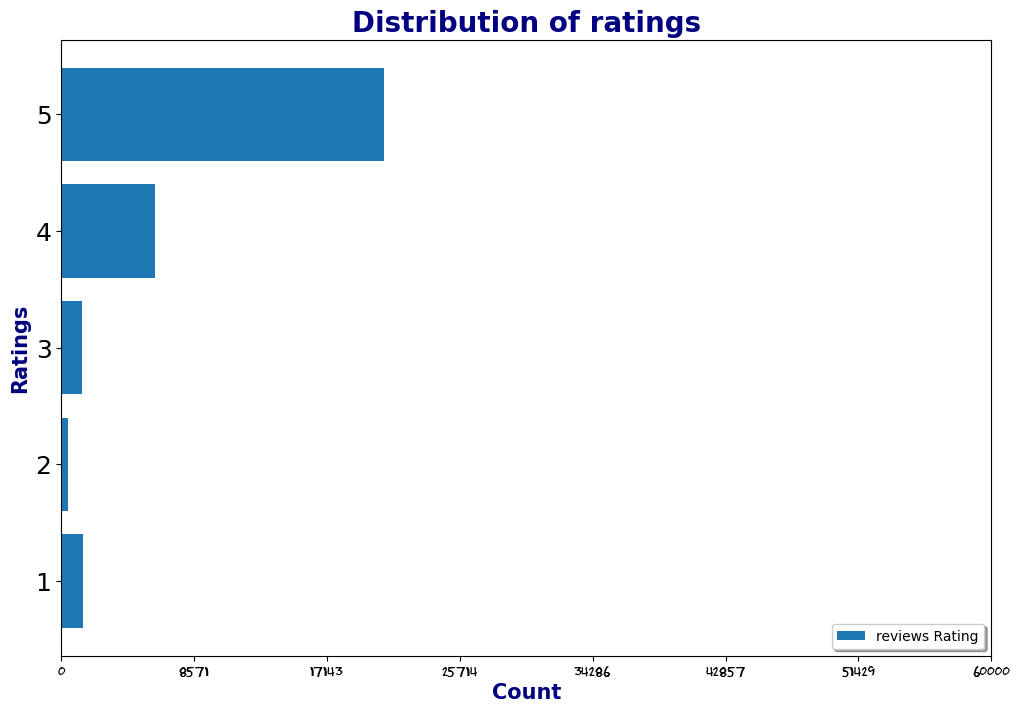

In [14]:
# Lets analysis the ratings by plotting ratings frequency

plt.figure(figsize=[12,8]) #[width, height]
x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())
plt.barh(x, y)
ticks_x = np.linspace(0, 60000, 8) # (start, end, no of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=18)

plt.title('Distribution of ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['reviews Rating'], shadow=True, loc=4)


In [15]:
# From above analysis we can see that most of ratings were from 4 start and 5 stars.

In [16]:
#Replacing  the Nan values to No Data for reviewers did purchase or not
df['reviews_didPurchase'].fillna('No Data', inplace=True)

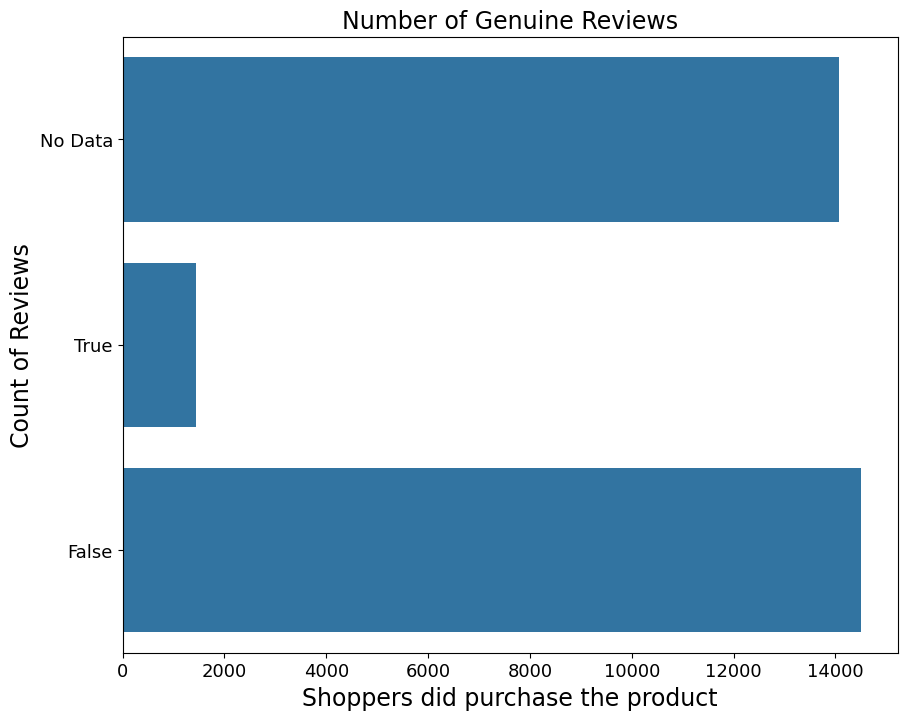

In [17]:
# Lets analyze the count  of customer who purchased and not purchased.
#Distribution of reviews for actual purchasing customers
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

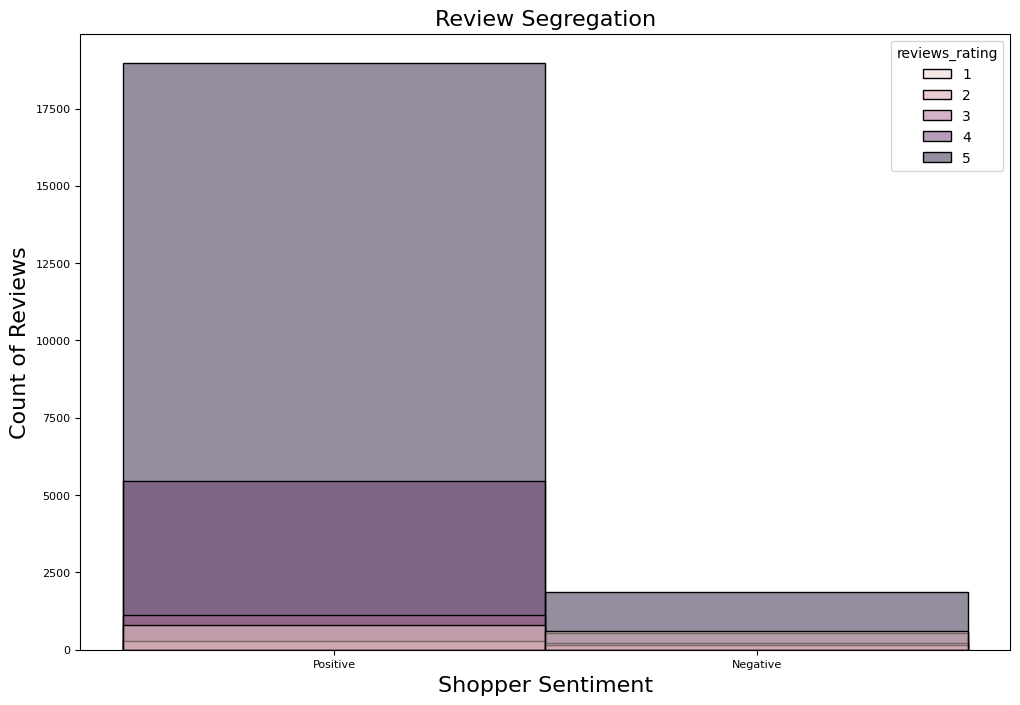

In [18]:
# To see any corrections are required in the dataframe is required using rating and user sentiment


plt.figure(figsize=(12,8))
ax = sns.histplot(hue=df['reviews_rating'],x=df['user_sentiment'])
ax.set_xlabel(xlabel="Shopper Sentiment", fontsize=16)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=16)
ax.axes.set_title('Review Segregation', fontsize=16)
ax.tick_params(labelsize=8)

In [19]:
# Number of Postive and Negatives in the data frame showing the high  class imbalance.
# we can also see that some the negative ratings were give values higher than 3 and some of positive ratings were give below 3, which need to be normalized.

* We need to correct the data available in the sentiments considering the rating of users

In [20]:
# To download the stopwords from NLTK library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

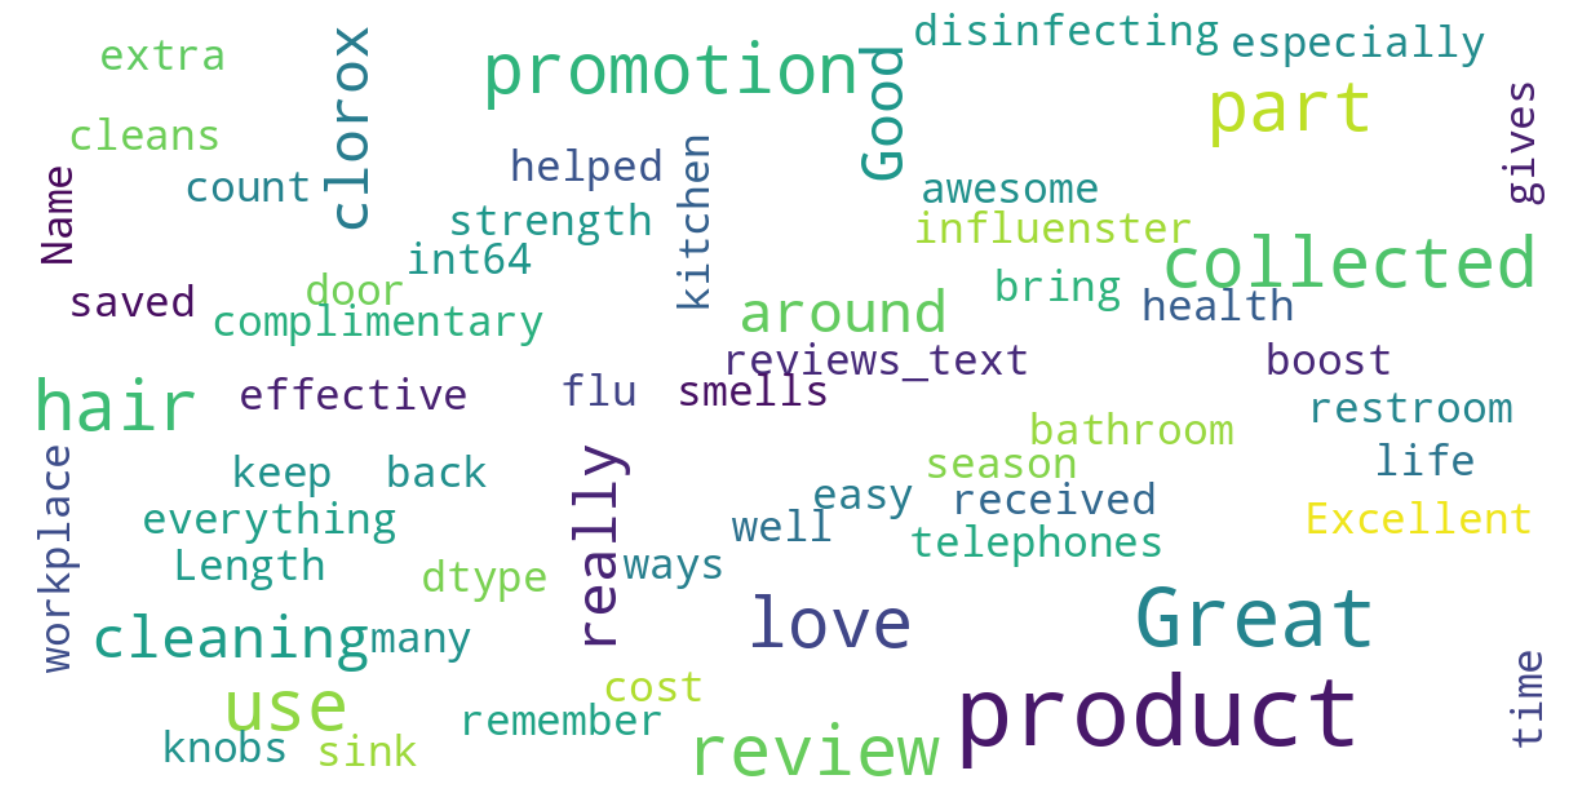

In [21]:
# Lets  Check the most word occurence using word cloud. That will give ideas about most important words.
from wordcloud import WordCloud ,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=25,
                     scale=3, random_state=1).generate(str(df['reviews_text'].value_counts()))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **3. Data Cleaning**  

In [22]:
# checking the columns with null values. We  can see that reviews_userProvince, reviews_userCity,reviews_doRecommend are having high null values,
# and we can drop these columns.
df.isnull().sum()

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,0
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


In [23]:
#From the null values percentages, columns reviews_userCity and reviews_userProvince can be dropped
df = df.drop(columns=['reviews_userCity','reviews_userProvince'],axis=1)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [24]:
df.shape

(30000, 13)

In [25]:
# Checking he number of rows with Null values
df.isnull().sum().sort_values(ascending=False) / len(df)


,0
reviews_doRecommend,0.085667
reviews_title,0.006333
manufacturer,0.004700
reviews_username,0.002100
reviews_date,0.001533
user_sentiment,0.000033
id,0.000000
brand,0.000000
categories,0.000000
name,0.000000


In [26]:
# lets check the count of positive and negative values.
df['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,26632
Negative,3367


In [27]:
# Lets correct the sentiment values as discussed above.
def review_sentiment_clear(x):
  if x >= 3 :
    return 'Postive'
  elif x > 0 and x < 3  :
    return 'Negative'

In [28]:
df['user_sentiment'] = df['reviews_rating'].apply(review_sentiment_clear)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Postive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Postive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Postive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [29]:
# After corrections for user sentiment
df['user_sentiment'].value_counts()

,count
user_sentiment,
Postive,28196
Negative,1804


# 4. Text Preprocessing

### conveting the text lower cased , removing Special Charater and lemmatizing

In [30]:
#Common functions for cleaning the text data
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [31]:
# to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    lower_case_words = [word.lower() for word in words]
    return lower_case_words

In [32]:
# removing the punctuation & splchars
def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    cleaned_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            cleaned_words.append(new_word)
    return cleaned_words

In [33]:
# special_characters removal
def remove_special_characters(text, remove_digits=True):
    """Remove the special Characters"""
    pattern = r'[^a-zA-z0-9\s]'  if not remove_digits  else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [34]:
# remove the stopwords
stopword_list= stopwords.words('english')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    clean_words = [word for word in words if word not in stopword_list]
    return clean_words

In [35]:
# stemming the words
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = [stemmer.stem(word) for word in words]
    return stems

In [36]:
# lemmatizing the words.
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    return lemmas

In [37]:
# lemmatized the verb
def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [38]:
# normalizing the words.
def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

In [39]:
# normalize and lemmatized.
def normalize_and_lemmatize(input_text):
    input_text = remove_special_characters(input_text)
    words = nltk.word_tokenize(input_text)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [40]:
# Take the Review comment and user sentiment as dataframe
sbpr_review_df = df[['reviews_text','user_sentiment']]
sbpr_review_df.head(5)

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Postive
1,Good flavor. This review was collected as part of a promotion.,Postive
2,Good flavor.,Postive
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


In [41]:
# check the shape
sbpr_review_df.shape

(30000, 2)

In [42]:
# adding a new columns for lemmatized_text for lematized text
sbpr_review_df['lemmatized_text'] = sbpr_review_df['reviews_text'].map(lambda text: normalize_and_lemmatize(text))
sbpr_review_df.head(5)

<ipython-input-42-3f6ba1899bb3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Postive,love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1,Good flavor. This review was collected as part of a promotion.,Postive,good flavor review collected part promotion
2,Good flavor.,Postive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting im disappointed paid much lube wont use could use normal personal lubricant le money le mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband bought gel u gel caused irritation felt like burning skin wouldnt recommend gel


In [43]:
# new dataframe with lemmatized text and user sentiment
lemmatized_df = sbpr_review_df[['lemmatized_text','user_sentiment']]
lemmatized_df

,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy,Postive
1,good flavor review collected part promotion,Postive
2,good flavor,Postive
3,read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting im disappointed paid much lube wont use could use normal personal lubricant le money le mess,Negative
4,husband bought gel u gel caused irritation felt like burning skin wouldnt recommend gel,Negative
...,...,...
29995,got conditioner influenster try im loving far oily hair use end hair feel amazing soft mess review collected part promotion,Postive
29996,love received review purpose influenster leaf hair feeling fresh smelling great,Postive
29997,first love smell product wash hair smooth easy brush receive product influenster testing purpose opinion review collected part promotion,Postive
29998,received influenster never go back anything else normally dont use conditioner hair oily fine make hair feel heavy doesnt get oily day really fantastic plan buying future review collected part promotion,Postive


In [44]:
#Encoding  the negative and postive to 0 and 1 respectively
lemmatized_df['user_sentiment'] = lemmatized_df['user_sentiment'].map({'Negative':0,'Postive':1})
lemmatized_df.head()

<ipython-input-44-743adff524c8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy,1
1,good flavor review collected part promotion,1
2,good flavor,1
3,read review looking buying one couple lubricant ultimately disappointed didnt even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting im disappointed paid much lube wont use could use normal personal lubricant le money le mess,0
4,husband bought gel u gel caused irritation felt like burning skin wouldnt recommend gel,0


### Splitting the dataset into train and test dataset

In [45]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# 5. Feature Extraction using Count Vectorizer and TFIDF Transformer


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

count_vect=CountVectorizer()
#Write your code to get the Vector count
X_train_counts=count_vect.fit_transform(lemmatized_df['lemmatized_text'])
#Write your code here to transform the word vector to tf-idf
tfidf_transformer=TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)


In [47]:
from sklearn.model_selection import train_test_split
# Train-Test split

train_X, test_X, train_y, test_y = train_test_split(X_train_tfidf, lemmatized_df['user_sentiment'], test_size=0.2, random_state=40)
train_y.value_counts()

,count
user_sentiment,
1,22559
0,1441


In [48]:
# train
print("x_train.shape",train_X.shape)
print("y_train.shape",train_y.shape)
print("x_test.shape",test_X.shape)
print("y_test.shape",test_y.shape)

x_train.shape (24000, 18400)
y_train.shape (24000,)
x_test.shape (6000, 18400)
y_test.shape (6000,)



---



In [49]:
#creating the pickle files for countvectorizer and TFIDF Transformer
import pickle
pickle.dump(count_vect,open(path+'pickle_file/count_vector.pkl','wb'))
pickle.dump(tfidf_transformer,open(path+'pickle_file/tfidf_transformer.pkl','wb'))

In [50]:
# Handling data imbaleces using smotting
count = Counter(train_y)
print('Before sampling :',count)

sampler = SMOTE()
# Train
x_train_sm,y_train_sm = sampler.fit_resample(train_X,train_y)

count = Counter(y_train_sm)
print('After sampling :',count)

Before sampling : Counter({1: 22559, 0: 1441})
After sampling : Counter({0: 22559, 1: 22559})


In [51]:
# Test data
x_test_sm,y_test_sm = sampler.fit_resample(test_X,test_y)

count = Counter(y_train_sm)
print('After sampling :',count)

After sampling : Counter({0: 22559, 1: 22559})


In [52]:
# train
print("x_train_sm.shape",x_train_sm.shape)
print("y_train_sm.shape",y_train_sm.shape)
print("x_test_sm.shape",x_test_sm.shape)
print("y_test_sm.shape",y_test_sm.shape)

x_train_sm.shape (45118, 18400)
y_train_sm.shape (45118,)
x_test_sm.shape (11274, 18400)
y_test_sm.shape (11274,)


# 5. Training Text Classification Model with Hyperparameters Tunnning
- Logistic Regression
- Random Forest Classifer
- XGBoost
- Naive Bays Classifier
#### Choose the best model with hyperparameter tuning

In [53]:
# importing libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
performance=[]

def eval_model(y_true, y_pred, y_pred_proba, type='Training',model_name='Logistic Regression'):
    print("*"*50)
    print("Model Name : :",model_name)
    accuracy= accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred, average='weighted')
    recall= recall_score(y_true, y_pred, average='weighted')
    f1=f1_score(y_true, y_pred, average='weighted')
    try:
      if len(np.unique(y_true)) > 2:  # for multiclass classification
          roc= roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
      else:
          roc= roc_auc_score(y_true, y_pred_proba[:, 1])
    except ValueError:
          print("ROC AUC Score: Not applicable")
    print(f"{type} results")
    print("*"*50)
    print("Accuracy: ", accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ", f1)
    print("ROC AUC Score: ", roc)


    # ROC AUC score might not be applicable for all cases (e.g., binary or multilabel)

    print("*"*50)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("*"*50)
    print("Confusion Matrix Display:\n", confusion_matrix(y_true, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
    performance.append(dict({'Model_name':model_name,
                       'Accuracy':accuracy,
                        'Roc_auc_score':roc,
                        'Precision':precision,
                        'F1_score':f1,
                             'type': type}))



    #disp.plot()

# run model
def run_model(model,param_grid,x_train,y_train,model_name='Logistic Regression'):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=40)
    grid=GridSearchCV(model,param_grid={},cv=cv,scoring='f1_weighted',verbose=1,n_jobs=-1)
    grid.fit(x_train,y_train)
    return grid.best_estimator_

## Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
**************************************************
Model Name : : Logsitic Regression
Training results
**************************************************
Accuracy:  0.9793430559865243
Precision:  0.9794324254494157
Recall:  0.9793430559865243
F1 Score:  0.9793420932929676
ROC AUC Score:  0.9969282335461804
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     22559
           1       0.99      0.97      0.98     22559

    accuracy                           0.98     45118
   macro avg       0.98      0.98      0.98     45118
weighted avg       0.98      0.98      0.98     45118

**************************************************
Confusion Matrix Display:
 [[22247   312]
 [  620 21939]]


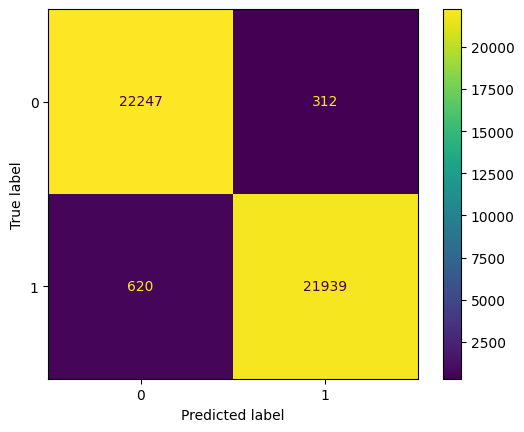

In [54]:
# # 1. Logsitic Regression
# lr = LogisticRegression()
# lr.fit(x_train_sm,y_train_sm)

#running and evaluating the Logistic Regression model
params = {
    'C': [0.001, 0.01, 0.1, 1],
    'max_iter': [100, 120, 150, 180,200],
    'class_weight': [None, 'balanced']
}
# Train data
lr_model_final=run_model(LogisticRegression(),params,x_train_sm,y_train_sm, model_name='Logsitic Regression')

eval_model(y_train_sm,lr_model_final.predict(x_train_sm),lr_model_final.predict_proba(x_train_sm),type='Training',model_name='Logsitic Regression')



**************************************************
**************************************************
Model Name : : Logsitic Regression
Test results
**************************************************
Accuracy:  0.9141387262728402
Precision:  0.9178323935876667
Recall:  0.9141387262728402
F1 Score:  0.9139485510798995
ROC AUC Score:  0.9775199146242535
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      5637
           1       0.88      0.96      0.92      5637

    accuracy                           0.91     11274
   macro avg       0.92      0.91      0.91     11274
weighted avg       0.92      0.91      0.91     11274

**************************************************
Confusion Matrix Display:
 [[4888  749]
 [ 219 5418]]


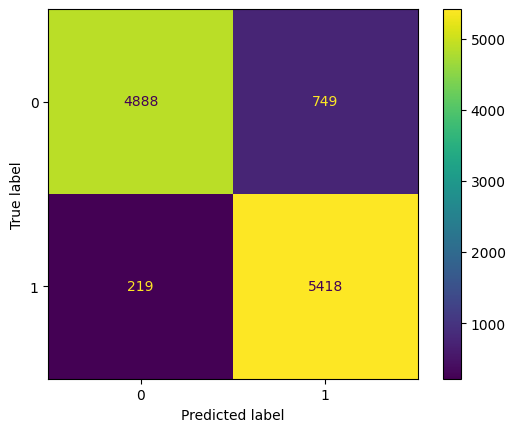

In [55]:
# Test Results
print("*"*50)
eval_model(y_test_sm,lr_model_final.predict(x_test_sm),lr_model_final.predict_proba(x_test_sm),type='Test',model_name='Logsitic Regression')

In [56]:
# y_pred = lr.predict(x_train_sm)
# peformance = model_metrics(y_train_sm,y_pred,'Logistic Regression',performance)

## RandomForest Classifier

In [57]:
#Running and evaluating the Random Forest model
params = {
    'n_estimators': [100, 120, 140, 150, 160,180],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10,15],
    'min_samples_split': [2, 4, 6, 8, 10,20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10,12],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf_model_final=run_model(RandomForestClassifier(),params,x_train_sm,y_train_sm, model_name='RandomForest Classifier')



Fitting 5 folds for each of 1 candidates, totalling 5 fits


**************************************************
Model Name : : RandomForest Classifier
Training results
**************************************************
Accuracy:  0.999875
Precision:  0.999875016620867
Recall:  0.999875
F1 Score:  0.9998749390287128
ROC AUC Score:  0.9998187496252791
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1441
           1       1.00      1.00      1.00     22559

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

**************************************************
Confusion Matrix Display:
 [[ 1438     3]
 [    0 22559]]


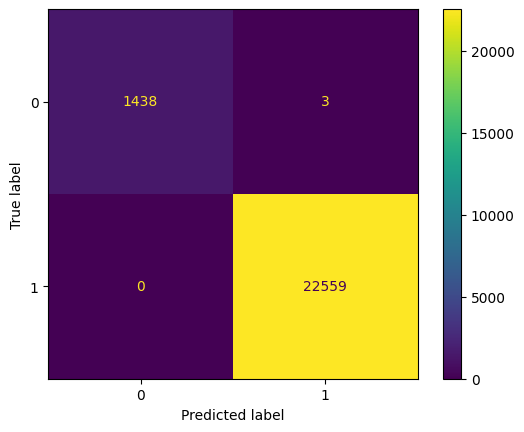

In [58]:
eval_model(train_y,rf_model_final.predict(train_X),rf_model_final.predict_proba(train_X),type='Training',model_name='RandomForest Classifier')

**************************************************
Model Name : : Random Forest
Test results
**************************************************
Accuracy:  0.9691666666666666
Precision:  0.966903154378482
Recall:  0.9691666666666666
F1 Score:  0.9666466919967935
ROC AUC Score:  0.9472195465712326
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.60      0.70       363
           1       0.97      0.99      0.98      5637

    accuracy                           0.97      6000
   macro avg       0.91      0.80      0.84      6000
weighted avg       0.97      0.97      0.97      6000

**************************************************
Confusion Matrix Display:
 [[ 217  146]
 [  39 5598]]


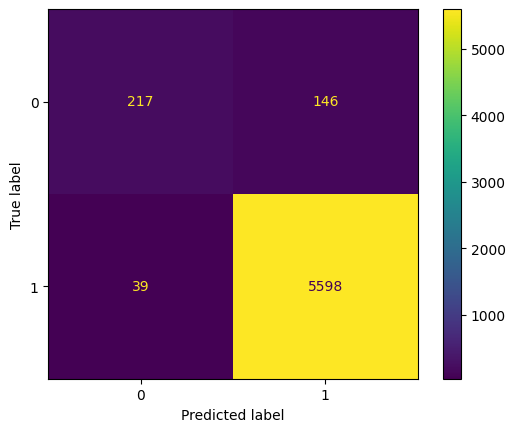

In [59]:
eval_model(test_y,rf_model_final.predict(test_X),rf_model_final.predict_proba(test_X),type='Test',model_name='Random Forest')

# Multinomial Naive Bayes


In [60]:
#running and evaluating the  Multinomial Naive Bayes
params = {
    'n_estimators': [100, 120, 150, 180],
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8,],
    'min_samples_leaf': [1, 2, 4, 6, 8,],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}
mnb_model=run_model(MultinomialNB(),params,x_train_sm,y_train_sm, model_name='Multinomial Naive Bayes')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


**************************************************
Model Name : : Multinomial Naive Bayes
Training results
**************************************************
Accuracy:  0.928125
Precision:  0.9637927175125723
Recall:  0.928125
F1 Score:  0.9395245751582625
ROC AUC Score:  0.9821070626767917
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.95      0.61      1441
           1       1.00      0.93      0.96     22559

    accuracy                           0.93     24000
   macro avg       0.72      0.94      0.79     24000
weighted avg       0.96      0.93      0.94     24000

**************************************************
Confusion Matrix Display:
 [[ 1366    75]
 [ 1650 20909]]


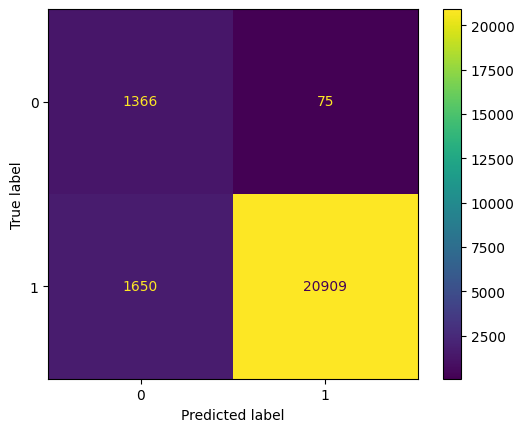

In [61]:
# Train Results
eval_model(train_y,mnb_model.predict(train_X),mnb_model.predict_proba(train_X),type='Training', model_name='Multinomial Naive Bayes')


**************************************************
Model Name : : Multinomial Naive Bayes
Test results
**************************************************
Accuracy:  0.9108333333333334
Precision:  0.9530398816164349
Recall:  0.9108333333333334
F1 Score:  0.9255085452532559
ROC AUC Score:  0.9468525303350404
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.85      0.53       363
           1       0.99      0.92      0.95      5637

    accuracy                           0.91      6000
   macro avg       0.69      0.88      0.74      6000
weighted avg       0.95      0.91      0.93      6000

**************************************************
Confusion Matrix Display:
 [[ 307   56]
 [ 479 5158]]


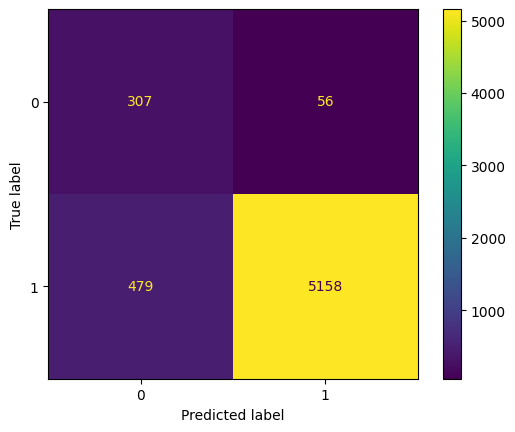

In [62]:
# Test Results
eval_model(test_y,mnb_model.predict(test_X),mnb_model.predict_proba(test_X),type='Test',model_name='Multinomial Naive Bayes')

## XGBoostClassifier

In [63]:
import xgboost as xgb

In [64]:
#4.XGBoostClassifier
params={
    'n_estimators': [10, 50, 100, 150, 180],
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 2, 4, 6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


xgb_model_final=run_model(xgb.XGBClassifier(),params,x_train_sm,y_train_sm, model_name='XGBoostClassifer')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


**************************************************
Model Name : : XGBoostClassifier
Training results
**************************************************
Accuracy:  0.9842916666666667
Precision:  0.9838065405222511
Recall:  0.9842916666666667
F1 Score:  0.9838606318597126
ROC AUC Score:  0.9911790561439031
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      1441
           1       0.99      1.00      0.99     22559

    accuracy                           0.98     24000
   macro avg       0.95      0.90      0.93     24000
weighted avg       0.98      0.98      0.98     24000

**************************************************
Confusion Matrix Display:
 [[ 1173   268]
 [  109 22450]]


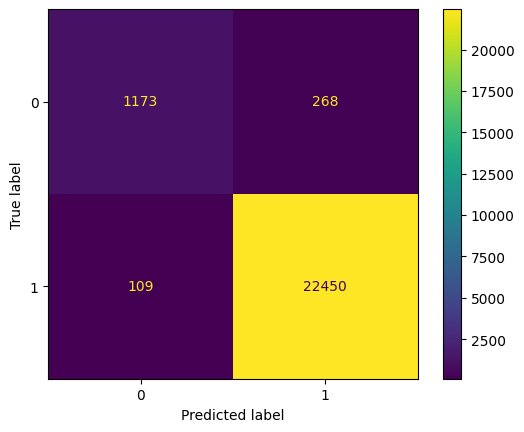

In [65]:
# Train Results
eval_model(train_y,xgb_model_final.predict(train_X),xgb_model_final.predict_proba(train_X),type='Training', model_name='XGBoostClassifier')



**************************************************
Model Name : : XGBoostClassifier
Test results
**************************************************
Accuracy:  0.9108333333333334
Precision:  0.9530398816164349
Recall:  0.9108333333333334
F1 Score:  0.9255085452532559
ROC AUC Score:  0.9468525303350404
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.85      0.53       363
           1       0.99      0.92      0.95      5637

    accuracy                           0.91      6000
   macro avg       0.69      0.88      0.74      6000
weighted avg       0.95      0.91      0.93      6000

**************************************************
Confusion Matrix Display:
 [[ 307   56]
 [ 479 5158]]


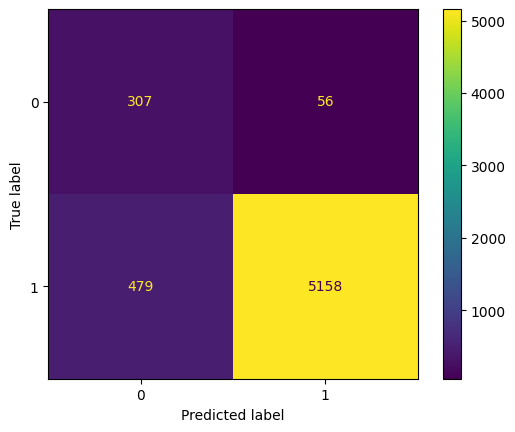

In [66]:
eval_model(test_y,mnb_model.predict(test_X),mnb_model.predict_proba(test_X),type='Test',model_name='XGBoostClassifier')

In [67]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score,type
0,Logsitic Regression,0.979343,0.996928,0.979432,0.979342,Training
1,Logsitic Regression,0.914139,0.977520,0.917832,0.913949,Test
2,RandomForest Classifier,0.999875,0.999819,0.999875,0.999875,Training
3,Random Forest,0.969167,0.947220,0.966903,0.966647,Test
4,Multinomial Naive Bayes,0.928125,0.982107,0.963793,0.939525,Training
5,Multinomial Naive Bayes,0.910833,0.946853,0.953040,0.925509,Test
6,XGBoostClassifier,0.984292,0.991179,0.983807,0.983861,Training
7,XGBoostClassifier,0.910833,0.946853,0.953040,0.925509,Test


In [68]:
# From above analysis we can see that Random forest is best metrics among all the models comprising all the metrics.
# Hence we will select the Random Forest classifier for out sentiment analysis.
# We can see that Random forest is already having very good  metirics for Accuracy	Roc_auc_score	Precision	F1_score	for both train and test data.
# So we will save this model for our prediction.

## Hyperparameter Tuning of For Random Forest model

In [75]:
 # parametes for Randomforest
 n_estimators = [100,120,130]
 max_depth = [5,6,8,10]
 min_samples_leaf = [2,4,5,6]
 criterion  = ['gini','entropy']
 params_rf = {'n_estimators':n_estimators,
           'max_depth':max_depth,
           'min_samples_leaf': min_samples_leaf,
           'criterion':criterion}

def run_model_fine_tunning(model,param_grid,x_train,y_train,model_name='RandomForestClassifier'):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=40)
    grid=GridSearchCV(model,param_grid=param_grid,cv=cv,scoring='f1_weighted',verbose=1,n_jobs=-1)
    grid.fit(x_train,y_train)
    return grid.best_estimator_

In [77]:
rf_best=run_model_fine_tunning(RandomForestClassifier(),params_rf,x_train_sm,y_train_sm, model_name='RandomForestClassifier')

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [78]:

 rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=130)

**************************************************
Model Name : : RandomForest_classifier
Training results
**************************************************
Accuracy:  0.9429583333333333
Precision:  0.9476259084418616
Recall:  0.9429583333333333
F1 Score:  0.9450527404563797
ROC AUC Score:  0.9237239390677584
**************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.61      0.56      1441
           1       0.97      0.96      0.97     22559

    accuracy                           0.94     24000
   macro avg       0.75      0.79      0.77     24000
weighted avg       0.95      0.94      0.95     24000

**************************************************
Confusion Matrix Display:
 [[  880   561]
 [  808 21751]]


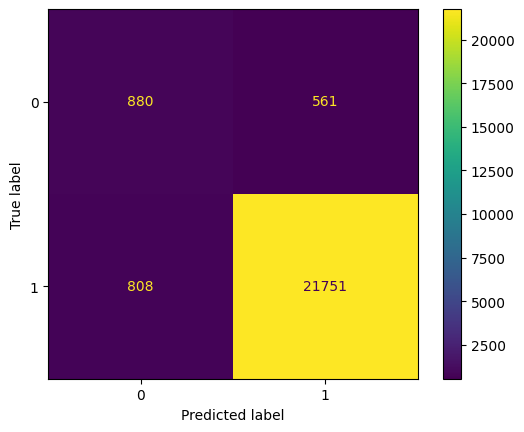

In [79]:
#eval_model(test_y,rf_best.predict(test_X),rf_best.predict(test_X),type='Test', model_name='RandomForest_classifier')
eval_model(train_y,rf_best.predict(train_X),rf_best.predict_proba(train_X),type='Training', model_name='RandomForest_classifier')



In [80]:
pickle.dump(rf_best,open(path+'pickle_file/RandomForest_classifier_best.pkl','wb'))


In [81]:
final_model = pickle.load(open(path+'pickle_file/RandomForest_classifier_best.pkl','rb'))
final_model

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=130)

In [82]:
pickle.dump(final_model,open(path+'pickle_file/final_model.pkl','wb'))

# 5. Recommedation system
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

## User and User recommedation


In [18]:
df = pd.read_csv(path+'sample30.csv')
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
2883,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2016-07-23T00:00:00.000Z,NaN,True,5,This film was every bit as good as the original. I only hope that there is another film in this series to come. A bunch of great character actors in their prime!,Great film,NaN,NaN,emerald,Positive
13734,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-03T00:00:00.000Z,False,True,5,I really like the convenience of the wipes along with the great lemon scent. They are great at cleaning up messes and are easy to use. This review was collected as part of a promotion.,Great Product,NaN,NaN,jrs555,Positive
26300,AVpfPnrU1cnluZ0-g9rL,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,Movies & TV,Instawatch Movies By VUDU,Shop Instawatch,Ultimate Editions,DTS,Movies & Music,Movies & TV Shows",Lions Gate,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),2015-03-04T00:00:00.000Z,NaN,True,4,befor ethe tv show there was a great sci fi movie and it was called stargate,classic old school scifi,NaN,NaN,xzaclee16,Positive
3841,AVpe8gsILJeJML43y6Ed,Pendaflex,"School & Office Supplies,Filing,Files,File Folders,Office,Office Supplies,Office Organization,Filing and Folders,All Folders and Filing,Project Folders,Office Products,Filing Products,Folders,electronics,Filing & Storage,File Boxes",Esselte Corporation,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",2011-12-11T07:00:00.000Z,NaN,True,4,This product it great to keep organized I just wish it was a bit more strudy.,Love At First Sight!!!,Bolingbrook,NaN,coco,Positive
21388,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Featured Brands,Health & Beauty,Unilever,Ways To Shop",Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,2015-08-05T00:00:00.000Z,False,False,1,"I had been using exxtra gel for years, until you decided to change the formula. It took me most of my life to finally find a gel that truly worked in my hair. At first I thought it was just the packaging, but the first time I had to buy a new bottle (I was using one every two weeks, as I have very long hair) I was appalled at the smell. It only got worse when I actually tried to use it in my hair. It is thin and sticky and not at all the same. And it seems I am not the only one that is extre...",Bring back the old formula!!!!,NaN,NaN,unhappy631,Negative


In [12]:
len(df['name'].unique())

271

## Dividing the dataset into train and test

In [19]:

from sklearn.model_selection import train_test_split
train,test = train_test_split(df,train_size=0.70,random_state=45)
print('train shape = ',train.shape)
print('test shape = ',test.shape)

train shape =  (21000, 15)
test shape =  (9000, 15)


In [30]:
#using train dataset and create correlation matrix
train_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(0)
train_pivot

# Pivot the train ratings' dataset into matrix format in which columns are items  and the rows are user IDs.


name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
dummy_train = train.copy()

In [34]:
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

### Creating dummy train & dummy test dataset
- Dummy train will be used later for prediction of the items which has not been rated by the user. To ignore the items rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the items rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [35]:
#Creating the train and test dataset for predicting and evaluating the correlation
#fill 1 in place of Nan for prediction


dummy_train = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_train).fillna(1)


,piggyboy420
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0
100:Complete First Season (blu-Ray),1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0
...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0
Weleda Everon Lip Balm,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0


In [51]:
dummy_train.loc['piggyboy420']


,piggyboy420
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0
100:Complete First Season (blu-Ray),1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0
...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0
Weleda Everon Lip Balm,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0


In [50]:
dummy_train.head(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Adjusted Cosine

In [47]:


def cosine_similarity(df):
    # using the adjusted cosine similarity
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T # Normalized dataset
    # using the pairwise_distance for cosine similarity
    user_correlation = 1- pairwise_distances (substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df


In [49]:
user_corr_matrix,normalized_df = cosine_similarity(dummy_train)
user_corr_matrix

array([[ 1.        , -0.00560086, -0.00560086, ..., -0.00560086,
        -0.00560086,  0.70570795],
       [-0.00560086,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00560086,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00560086, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00560086, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 0.70570795, -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [52]:
user_corr_matrix.shape

(18205, 18205)

## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [53]:
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [54]:
df[df['reviews_username'] == 'zwithanx']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
14006,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-02-20T00:00:00.000Z,False,True,5,"The wipes are so convenient even with a baby in one arm, i can still tackle tough messes with the wipes. great product. This review was collected as part of a promotion.",one hand cleaning,NaN,NaN,zwithanx,Positive


Rating predicted by the user (for items rated as well as not rated) is the weighted sum of correlation with the items rating (as present in the rating dataset).


In [75]:
user_pred_ratings = np.dot(user_corr_matrix,df_pivot.fillna(0))
user_pred_ratings

array([[ 0.        ,  3.43525911,  0.        , ..., 11.58203389,
         2.01283849,  0.        ],
       [ 0.        , 25.30676265,  0.        , ..., 16.43332455,
         0.        ,  2.3002549 ],
       [ 0.        , 25.30676265,  0.        , ..., 16.43332455,
         0.        ,  2.3002549 ],
       ...,
       [ 0.        ,  4.7978916 ,  0.        , ...,  8.21468496,
         3.52853977,  0.        ],
       [ 0.        ,  4.7978916 ,  0.        , ...,  8.21468496,
         3.52853977,  0.        ],
       [ 0.        ,  1.00381355,  0.        , ..., 10.03923993,
         2.87531862,  0.        ]])

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero.

In [76]:
user_pred_ratings.shape

(18205, 254)

In [77]:
user_final_rating = np.multiply(user_pred_ratings,dummy_train)
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,3.435259,0.0,0.0,2.012838,0.0,0.0,0.0,0.0,6.295304,...,1.887892,0.0,0.000000,0.0,1.732566,0.0,0.0,11.582034,2.012838,0.000000
02dakota,0.0,25.306763,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,15.957395,...,0.000000,0.0,2.300255,0.0,2.485134,0.0,0.0,16.433325,0.000000,2.300255
02deuce,0.0,25.306763,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,15.957395,...,0.000000,0.0,2.300255,0.0,2.485134,0.0,0.0,16.433325,0.000000,2.300255
0325home,0.0,4.797892,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.439608,...,10.926452,0.0,0.000000,0.0,0.000000,0.0,0.0,8.214685,3.528540,0.000000
06stidriver,0.0,4.797892,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.439608,...,10.926452,0.0,0.000000,0.0,0.000000,0.0,0.0,8.214685,3.528540,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,2.875319,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,7.565429,...,3.528540,0.0,0.000000,0.0,0.000000,0.0,0.0,5.781905,0.000000,0.000000
zwithanx,0.0,4.797892,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.439608,...,10.926452,0.0,0.000000,0.0,0.000000,0.0,0.0,8.214685,3.528540,0.000000
zxcsdfd,0.0,4.797892,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.439608,...,10.926452,0.0,0.000000,0.0,0.000000,0.0,0.0,8.214685,3.528540,0.000000


In [78]:
#

In [79]:
d = user_final_rating
d.loc['zwithanx'].sort_values(ascending=False)[:20]

,zwithanx
name,
Clorox Disinfecting Bathroom Cleaner,1377.697365
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,53.653746
"Burt's Bees Lip Shimmer, Raisin",36.187300
Tostitos Bite Size Tortilla Chips,31.995611
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),25.935222
The Resident Evil Collection 5 Discs (blu-Ray),23.209322
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),18.692906
Mike Dave Need Wedding Dates (dvd + Digital),18.138921
"Coty Airspun Face Powder, Translucent Extra Coverage",14.171690


In [80]:
d = user_final_rating
d.loc['piggyboy420'].sort_values(ascending=False)[:20]

,piggyboy420
name,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,13.070753
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,9.803381
"Burt's Bees Lip Shimmer, Raisin",6.013673
The Resident Evil Collection 5 Discs (blu-Ray),6.013673
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5.746861
Clorox Disinfecting Bathroom Cleaner,5.360452
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,4.234248
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,3.528540
Naturtint Nutrideep Multiplier Protective Cream,3.528540


### Evaluation for user-user recommendation system

In [81]:
## Evaluation
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2006, 15)

In [85]:
corr_df = pd.DataFrame(user_corr_matrix)
corr_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
0,1.0,0.0,0.0,0.0,0.0,0.0,0.705708,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705708
1,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000
4,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000


In [86]:
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)
corr_df

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,1.000000,0.0,0.0,0.0,0.0,0.0,0.705708,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705708
02dakota,0.000000,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
02deuce,0.000000,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
0325home,0.000000,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000
06stidriver,0.000000,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
zwithanx,0.000000,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000
zxcsdfd,0.000000,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000


In [87]:
list_name = common.reviews_username.tolist()

In [96]:
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [97]:
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [98]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T
corr_df3.head()

,1234,123charlie,143st,1943,4cloroxl,50cal,7inthenest,aac06002,aaron,abby,...,yeya,ygtz,yohnie1,yshan,yucky111,yummy,yvonne,zburt5,zebras,zippy
user_name,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.575064,0.0,0.402568,0.0,0.575064,0.0,0.0,0.814875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402568
123charlie,0.575064,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.705708,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
143st,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1943,0.402568,0.000000,0.0,1.000000,0.0,0.705708,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496032
4cloroxl,0.000000,0.000000,0.0,0.000000,1.0,0.000000,1.0,0.0,0.000000,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


In [99]:
common_user_tb = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)

In [100]:
common_user_tb

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
corr_df3[corr_df3<0] = 0
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

array([[8.6748321 , 1.61027079, 0.        , ..., 8.32398132, 1.30146082,
        0.        ],
       [2.21832113, 0.        , 0.        , ..., 3.94035944, 0.        ,
        0.        ],
       [5.09363975, 5.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.40419409, 0.        ,
        0.        ],
       [2.87531862, 0.        , 0.        , ..., 5.76870664, 0.        ,
        0.        ],
       [9.09435564, 1.98412698, 1.19486584, ..., 7.23251995, 1.61027079,
        0.        ]])

In [102]:
dummy_test = common.copy()
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,55.291433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(1687, 120)

In [105]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [106]:
total_non_nan

1926

In [107]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

2.100047434600925


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



## Item and Item Recommendation System

In [116]:
train_pivot_ii = dummy_train.T
train_pivot_ii

reviews_username,00sab00,02dakota,02deuce,0325home,06stidriver,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,...,zowie,zozo0o,zsazsa,zt313,zubb,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Weleda Everon Lip Balm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [117]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [111]:
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0
item_pred_rating

array([[0.99518214, 0.91506549, 0.90575066, ..., 0.94586401, 0.81101135,
        0.75506804],
       [0.9958703 , 0.90924585, 0.90618585, ..., 0.96146676, 0.82033514,
        0.75253253],
       [0.9958703 , 0.90924585, 0.90618585, ..., 0.96146676, 0.82033514,
        0.75253253],
       ...,
       [1.0007424 , 0.94889482, 0.90926698, ..., 1.00356205, 0.83138338,
        0.76846774],
       [1.0007424 , 0.94889482, 0.90926698, ..., 1.00356205, 0.83138338,
        0.76846774],
       [0.99239675, 0.9116709 , 0.90398917, ..., 0.93937195, 0.8032249 ,
        0.7483555 ]])

In [118]:
#final rating for items
item_final_rating = np.multiply(item_pred_rating,train_pivot)
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
d_item = item_final_rating
d_item.loc['0325home'].sort_values(ascending=False)[:20]

,0325home
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0
"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",0.0
Olivella Bar Soap - 3.52 Oz,0.0
Orajel Maximum Strength Toothache Pain Relief Liquid,0.0
"Pantene Color Preserve Volume Shampoo, 25.4oz",0.0
Pantene Pro-V Expert Collection Age Defy Conditioner,0.0
Pearhead Id Bracelet Frame,0.0
"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",0.0
"Physicians Formula Mineral Wear Talc-Free Mineral Correcting Powder, Creamy Natural",0.0


### Evaluation for item and item

In [120]:
common_item = test[test.name.isin(train.name)]
common_item

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
19154,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-12-30T00:00:00.000Z,False,True,5,"Very powerful, great at removing stains, and so convenient to use...just grab and go! This review was collected as part of a promotion.",Clorox Rocks,NaN,NaN,briley,Positive
22871,AVpfov9TLJeJML43A7B0,Bisquick,"Food & Beverage,Baking & Cooking Essentials,Baking Essentials,Baking Mixes,Breakfast & Cereal,Pancakes, Waffles & Baking Mixes,Food,Pancake & Waffle Mix,Grocery & Gourmet Food,Cooking & Baking,Biscuits,Featured Brands,Grocery,General Mills,Food & Grocery,Breakfast Foods,Pancake Mixes & Syrup,More Dry Mixes,Baking","GENERAL MILLS SALES, INC.",Bisquick Original Pancake And Baking Mix - 40oz,2012-07-25T00:00:00.000Z,False,True,5,"you can do sooooo much with this product..biscuits, impossible pies, shortcake, deserts, think them up yourself or go to the Betty Crocker recipe site to get some ideas... I looked at a few and thought of many more on my own...",Alot of a good thing!!!,NaN,NaN,foxfire61,Positive
11830,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-05T00:00:00.000Z,False,True,5,I love the lemon fresh smell it leaves. I know that what ever I use the Clorox wipe it will be clean. It is extremely important since my son is in the process of getting chemotherapy. Must have a germ free home. This review was collected as part of a promotion.,Keep Cancer Home Germ Free,NaN,NaN,margies,Positive
707,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2015-08-18T00:00:00.000Z,False,False,1,"Windex used to be the best but whatever they have done to the formula has now made it horrible. It leaves a film on all the windows, mirrors, and glass table tops. What happened Waste of my money. Will not buy and do not recommend.",no longer a good glass cleaner,NaN,NaN,mel,Negative
20513,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-04-07T12:05:20.000Z,NaN,NaN,5,I have two sons and they make a mess in their bathroom and this product handles it with no problem,Great In Showers,NaN,NaN,jillybeansoccermom,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28158,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,B

In [121]:
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T

common_item_pivot.shape

(206, 8379)

In [122]:
item_corr_df = pd.DataFrame(item_corr_matrix)
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.000000,-0.001232,-0.000174,-0.000246,-0.000123,-0.000246,-0.000123,-0.000213,-0.000174,-0.001219,...,-0.001015,-0.000174,-0.000213,-0.000123,-0.000301,-0.000389,-0.000246,-0.001846,-0.000768,-0.000662
1,-0.001232,1.000000,-0.000779,-0.001102,-0.000551,-0.001102,-0.000551,-0.000954,-0.000779,-0.005468,...,-0.004551,-0.000779,-0.000954,-0.000551,-0.001349,-0.001742,-0.001102,-0.001520,-0.003444,-0.002969
2,-0.000174,-0.000779,1.000000,-0.000155,-0.000078,-0.000155,-0.000078,-0.000135,-0.000110,-0.000771,...,-0.000642,-0.000110,-0.000135,-0.000078,-0.000190,-0.000246,-0.000155,-0.001167,-0.000486,-0.000419
3,-0.000246,-0.001102,-0.000155,1.000000,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,-0.000220,-0.001651,-0.000687,-0.000592
4,-0.000123,-0.000551,-0.000078,-0.000110,1.000000,-0.000110,-0.000055,-0.000095,-0.000078,-0.000545,...,-0.000454,-0.000078,-0.000095,-0.000055,-0.000135,-0.000174,-0.000110,-0.000825,0.159961,-0.000296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.000389,-0.001742,-0.000246,-0.000348,-0.000174,-0.000348,-0.000174,-0.000301,-0.000246,-0.001725,...,-0.001435,-0.000246,-0.000301,-0.000174,-0.000426,1.000000,-0.000348,-0.002611,-0.001086,-0.000936
250,-0.000246,-0.001102,-0.000155,-0.000220,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,1.000000,-0.001651,-0.000687,-0.000592
251,-0.001846,-0.001520,-0.001167,-0.001651,-0.000825,-0.001651,-0.000825,-0.001430,-0.001167,-0.001368,...,-0.006819,-0.001167,-0.001430,-0.000825,0.025490,-0.002611,-0.001651,1.000000,-0.005160,-0.004448
252,-0.000768,-0.003444,-0.000486,-0.000687,0.159961,-0.000687,-0.000343,-0.000595,-0.000486,-0.003409,...,-0.002837,-0.000486,-0.000595,-0.000343,-0.000841,-0.001086,-0.000687,-0.005160,1.000000,-0.001851


In [123]:
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001232,-0.000174,-0.000246,-0.000123,-0.000246,-0.000123,-0.000213,-0.000174,-0.001219,...,-0.001015,-0.000174,-0.000213,-0.000123,-0.000301,-0.000389,-0.000246,-0.001846,-0.000768,-0.000662
100:Complete First Season (blu-Ray),-0.001232,1.000000,-0.000779,-0.001102,-0.000551,-0.001102,-0.000551,-0.000954,-0.000779,-0.005468,...,-0.004551,-0.000779,-0.000954,-0.000551,-0.001349,-0.001742,-0.001102,-0.001520,-0.003444,-0.002969
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000174,-0.000779,1.000000,-0.000155,-0.000078,-0.000155,-0.000078,-0.000135,-0.000110,-0.000771,...,-0.000642,-0.000110,-0.000135,-0.000078,-0.000190,-0.000246,-0.000155,-0.001167,-0.000486,-0.000419
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000246,-0.001102,-0.000155,1.000000,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,-0.000220,-0.001651,-0.000687,-0.000592
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000123,-0.000551,-0.000078,-0.000110,1.000000,-0.000110,-0.000055,-0.000095,-0.000078,-0.000545,...,-0.000454,-0.000078,-0.000095,-0.000055,-0.000135,-0.000174,-0.000110,-0.000825,0.159961,-0.000296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000389,-0.001742,-0.000246,-0.000348,-0.000174,-0.000348,-0.000174,-0.000301,-0.000246,-0.001725,...,-0.001435,-0.000246,-0.000301,-0.000174,-0.000426,1.000000,-0.000348,-0.002611,-0.001086,-0.000936
Weleda Everon Lip Balm,-0.000246,-0.001102,-0.000155,-0.000220,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,1.000000,-0.001651,-0.000687,-0.000592
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001846,-0.001520,-0.001167,-0.001651,-0.000825,-0.001651,-0.000825,-0.001430,-0.001167,-0.001368,...,-0.006819,-0.001167,-0.001430,-0.000825,0.025490,-0.002611,-0.001651,1.000000,-0.005160,-0.004448


In [124]:
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
item_corr_df

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001232,-0.000174,-0.000246,-0.000123,-0.000246,-0.000123,-0.000213,-0.000174,-0.001219,...,-0.001015,-0.000174,-0.000213,-0.000123,-0.000301,-0.000389,-0.000246,-0.001846,-0.000768,-0.000662
100:Complete First Season (blu-Ray),-0.001232,1.000000,-0.000779,-0.001102,-0.000551,-0.001102,-0.000551,-0.000954,-0.000779,-0.005468,...,-0.004551,-0.000779,-0.000954,-0.000551,-0.001349,-0.001742,-0.001102,-0.001520,-0.003444,-0.002969
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000174,-0.000779,1.000000,-0.000155,-0.000078,-0.000155,-0.000078,-0.000135,-0.000110,-0.000771,...,-0.000642,-0.000110,-0.000135,-0.000078,-0.000190,-0.000246,-0.000155,-0.001167,-0.000486,-0.000419
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000246,-0.001102,-0.000155,1.000000,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,-0.000220,-0.001651,-0.000687,-0.000592
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000123,-0.000551,-0.000078,-0.000110,1.000000,-0.000110,-0.000055,-0.000095,-0.000078,-0.000545,...,-0.000454,-0.000078,-0.000095,-0.000055,-0.000135,-0.000174,-0.000110,-0.000825,0.159961,-0.000296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000389,-0.001742,-0.000246,-0.000348,-0.000174,-0.000348,-0.000174,-0.000301,-0.000246,-0.001725,...,-0.001435,-0.000246,-0.000301,-0.000174,-0.000426,1.000000,-0.000348,-0.002611,-0.001086,-0.000936
Weleda Everon Lip Balm,-0.000246,-0.001102,-0.000155,-0.000220,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,1.000000,-0.001651,-0.000687,-0.000592
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001846,-0.001520,-0.001167,-0.001651,-0.000825,-0.001651,-0.000825,-0.001430,-0.001167,-0.001368,...,-0.006819,-0.001167,-0.001430,-0.000825,0.025490,-0.002611,-0.001651,1.000000,-0.005160,-0.004448


In [126]:
list_items

['Clorox Disinfecting Bathroom Cleaner',
 'Bisquick Original Pancake And Baking Mix - 40oz',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
 'Clorox Disinfecting Bathroom Cleaner',
 'Clorox Disinfecting Bathroom Cleaner',
 'Nexxus Exxtra Gel Style Creation Sculptor',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
 'Clorox Disinfecting Bathroom Cleaner',
 'Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 "Jason Aldean - They Don't Know",
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
 'Clorox Disinfecting Wipes Value Pack Sc

In [125]:
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
item_corr_df1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001232,-0.000174,-0.000246,-0.000123,-0.000246,-0.000123,-0.000213,-0.000174,-0.001219,...,-0.001015,-0.000174,-0.000213,-0.000123,-0.000301,-0.000389,-0.000246,-0.001846,-0.000768,-0.000662
100:Complete First Season (blu-Ray),-0.001232,1.000000,-0.000779,-0.001102,-0.000551,-0.001102,-0.000551,-0.000954,-0.000779,-0.005468,...,-0.004551,-0.000779,-0.000954,-0.000551,-0.001349,-0.001742,-0.001102,-0.001520,-0.003444,-0.002969
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000174,-0.000779,1.000000,-0.000155,-0.000078,-0.000155,-0.000078,-0.000135,-0.000110,-0.000771,...,-0.000642,-0.000110,-0.000135,-0.000078,-0.000190,-0.000246,-0.000155,-0.001167,-0.000486,-0.000419
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000246,-0.001102,-0.000155,1.000000,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,-0.000220,-0.001651,-0.000687,-0.000592
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000246,-0.001102,-0.000155,-0.000220,-0.000110,1.000000,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,-0.000220,-0.001651,-0.000687,-0.000592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000389,-0.001742,-0.000246,-0.000348,-0.000174,-0.000348,-0.000174,-0.000301,-0.000246,-0.001725,...,-0.001435,-0.000246,-0.000301,-0.000174,-0.000426,1.000000,-0.000348,-0.002611,-0.001086,-0.000936
Weleda Everon Lip Balm,-0.000246,-0.001102,-0.000155,-0.000220,-0.000110,-0.000220,-0.000110,-0.000190,-0.000155,-0.001091,...,-0.000908,-0.000155,-0.000190,-0.000110,-0.000269,-0.000348,1.000000,-0.001651,-0.000687,-0.000592
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001846,-0.001520,-0.001167,-0.001651,-0.000825,-0.001651,-0.000825,-0.001430,-0.001167,-0.001368,...,-0.006819,-0.001167,-0.001430,-0.000825,0.025490,-0.002611,-0.001651,1.000000,-0.005160,-0.004448


In [127]:
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T
item_corr_df3

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001232,-0.000174,-0.000246,-0.000246,-0.000213,-0.000174,-0.001219,-0.000348,-0.000174,...,-0.001080,-0.001015,-0.000174,-0.000213,-0.000301,-0.000389,-0.000246,-0.001846,-0.000768,-0.000662
100:Complete First Season (blu-Ray),-0.001232,1.000000,-0.000779,-0.001102,-0.001102,-0.000954,-0.000779,-0.005468,-0.001558,-0.000779,...,-0.004844,-0.004551,-0.000779,-0.000954,-0.001349,-0.001742,-0.001102,-0.001520,-0.003444,-0.002969
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000174,-0.000779,1.000000,-0.000155,-0.000155,-0.000135,-0.000110,-0.000771,-0.000220,-0.000110,...,-0.000683,-0.000642,-0.000110,-0.000135,-0.000190,-0.000246,-0.000155,-0.001167,-0.000486,-0.000419
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000246,-0.001102,-0.000155,1.000000,-0.000220,-0.000190,-0.000155,-0.001091,-0.000311,-0.000155,...,-0.000966,-0.000908,-0.000155,-0.000190,-0.000269,-0.000348,-0.000220,-0.001651,-0.000687,-0.000592
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000246,-0.001102,-0.000155,-0.000220,1.000000,-0.000190,-0.000155,-0.001091,-0.000311,-0.000155,...,-0.000966,-0.000908,-0.000155,-0.000190,-0.000269,-0.000348,-0.000220,-0.001651,-0.000687,-0.000592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000389,-0.001742,-0.000246,-0.000348,-0.000348,-0.000301,-0.000246,-0.001725,-0.000492,-0.000246,...,-0.001528,-0.001435,-0.000246,-0.000301,-0.000426,1.000000,-0.000348,-0.002611,-0.001086,-0.000936
Weleda Everon Lip Balm,-0.000246,-0.001102,-0.000155,-0.000220,-0.000220,-0.000190,-0.000155,-0.001091,-0.000311,-0.000155,...,-0.000966,-0.000908,-0.000155,-0.000190,-0.000269,-0.000348,1.000000,-0.001651,-0.000687,-0.000592
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001846,-0.001520,-0.001167,-0.001651,-0.001651,-0.001430,-0.001167,-0.001368,-0.002335,-0.001167,...,0.000437,-0.006819,-0.001167,-0.001430,0.025490,-0.002611,-0.001651,1.000000,-0.005160,-0.004448


In [128]:
item_corr_df3[item_corr_df3<0] = 0
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

(206, 8379)

In [129]:
test_items = common_item.copy()


In [131]:
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)
final_item_ratings

reviews_username,00dog3,01impala,08dallas,09mommy11,1143mom,1234,123charlie,123numbers,12cass12,132457,...,zombiedad80,zombiegirl22,zombiekiller,zoney86,zookeeper,zpalma,zsarah,zulaa118,zxjki,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
X  = final_item_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [133]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [134]:
rmse = (sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

3.5531558437527266


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



## Best suited recommendation system
- By checking the root mean squared error for user-user and item-item recommendation systems. We can say that user-user recomndation system is best model among two.Hence we will user user-user reccomndation model as it is having less RMSE.


```
User-User recommendation
```



In [135]:
 #Creating a pickle file for user-user recommendation system
import pickle
pickle.dump(user_final_rating,open(path+'pickle_file/user_final_rating.pkl','wb'))

##### Final ```model.py``` attached which will recommend the top 20 products and then top 5 products based on sentiment
##### pickle files are available in ```pickle_file``` folder
##### ```app.py``` contains the flask deployment
##### Heroku URL : ```https://sentiment-based-product-recomm-fbd83d8030fc.herokuapp.com```